In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pyp
pd.set_option("display.max_rows",None)

data=pd.read_excel("C:\\Users\\Bachelor_001\\OneDrive\\Documents\\CERT F\\Folds5x2_pp.xlsx",sheet_name="Sheet2")
print(data)

data2=data.copy()
print(data2)

         AT      V       AP      RH      PE
0      9.59  38.56  1017.01   60.10  481.30
1     12.04  42.34  1019.72   94.67  465.36
2     13.87  45.08  1024.42   81.69  465.48
3     13.72  54.30  1017.89   79.08  467.05
4     15.14  49.64  1023.78   75.00  463.58
5     23.63  60.93  1006.41   83.06  439.90
6     22.99  61.02  1009.88   81.56  440.85
7     12.85  40.00  1015.89   68.85  463.74
8     29.88  68.08  1011.14   55.78  429.33
9     23.22  66.56  1002.47   85.39  437.11
10     9.02  38.08  1019.02   69.98  478.32
11    26.12  75.60  1017.41   72.31  439.68
12    16.66  36.71  1013.68   70.66  466.07
13    29.56  52.84  1006.09   42.17  436.46
14    30.00  61.50  1009.40   48.63  435.60
15    30.39  70.98  1007.55   72.76  435.48
16    20.88  47.45  1007.50   76.21  449.34
17    28.14  61.47  1009.69   64.66  435.35
18    18.86  46.48  1007.28   78.47  452.00
19    31.85  68.30  1014.76   47.06  428.72
20    17.47  63.31  1015.28   88.22  450.68
21    25.04  51.95  1005.56   66

checking the data

In [138]:
data2.info()
data2[data2.isna()]
data2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


(9568, 5)

checking and cleaning AT

In [140]:
data2['AT'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 9568 entries, 0 to 9567
Series name: AT
Non-Null Count  Dtype  
--------------  -----  
9568 non-null   float64
dtypes: float64(1)
memory usage: 74.9 KB


In [141]:
#PE=annual electrical energy output
#AT=Temperature
#RH=relative humidity
#V  =exhaust vacuum 
#AP = ambient pressure

defining the x and y

In [143]:
y=data2['PE'].values
print(y)
x=data2.drop('PE',axis='columns').values
print(x)



[481.3  465.36 465.48 ... 429.34 421.57 454.41]
[[   9.59   38.56 1017.01   60.1 ]
 [  12.04   42.34 1019.72   94.67]
 [  13.87   45.08 1024.42   81.69]
 ...
 [  30.44   56.24 1005.19   56.24]
 [  23.     66.05 1020.61   80.29]
 [  17.75   49.25 1020.86   63.67]]


testing and training

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape
y_train.shape

(6697,)

training

In [147]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

predicting

In [149]:
model.predict([[20,40,60,80]])

array([397.07465271])

In [150]:
model.predict([[9.59,38.56,1017.01,60.10]])

array([480.18995996])

In [151]:
model=LinearRegression()
model.fit(x_test,y_test)
y_predict=model.predict(x_test)
print(y_predict)

[482.1761518  446.78047095 470.84870171 ... 465.2479468  443.35605304
 442.79691155]


evaluating the model

In [153]:
from sklearn.metrics import r2_score
#model=r2_score
r2_score(y_test,y_predict)

0.9321233513195674

creating a scatter plot

Text(0.5, 1.0, 'RELATIONSHIP BETWEEN ACTUAL AND PREDICTION')

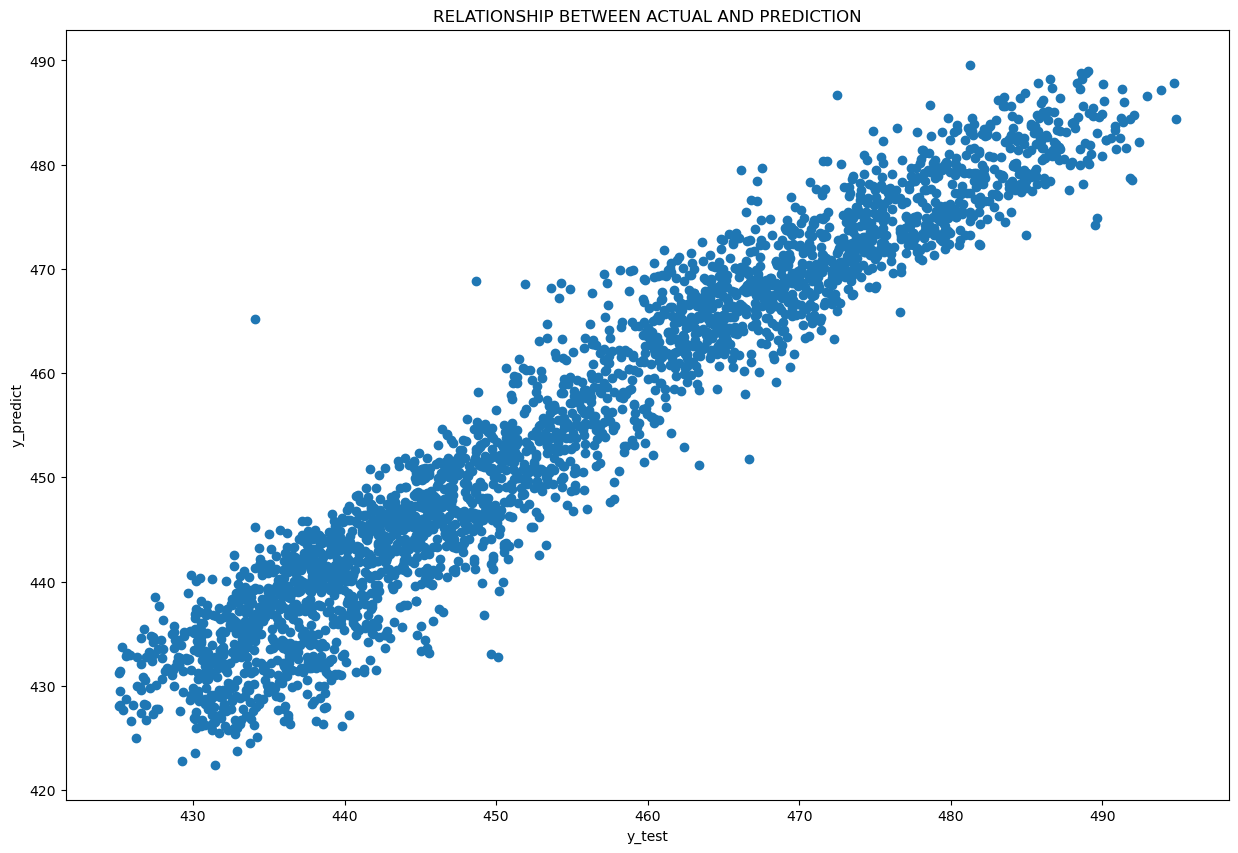

In [155]:
pyp.figure(figsize=(15,10))
pyp.scatter(y_test,y_predict,)
pyp.xlabel('y_test')
pyp.ylabel('y_predict')
pyp.title('RELATIONSHIP BETWEEN ACTUAL AND PREDICTION')
#pyp.colour('black')


In [156]:
predicted_values=pd.DataFrame({'Actual_values':y_test,
                               'predicted_y':y_predict,
                               'difference':y_test- y_predict})
print(predicted_values)

      Actual_values  predicted_y  difference
0            492.39   482.176152   10.213848
1            444.31   446.780471   -2.470471
2            478.07   470.848702    7.221298
3            475.53   474.557862    0.972138
4            478.21   477.521015    0.688985
5            473.84   475.938933   -2.098933
6            437.11   441.909379   -4.799379
7            475.06   479.465029   -4.405029
8            460.56   465.161712   -4.601712
9            430.80   433.295588   -2.495588
10           479.14   475.038447    4.101553
11           462.28   466.009852   -3.729852
12           471.63   470.068378    1.561622
13           434.45   436.647721   -2.197721
14           456.64   459.491632   -2.851632
15           452.53   451.228983    1.301017
16           440.21   438.875817    1.334183
17           481.56   481.559796    0.000204
18           470.71   478.337338   -7.627338
19           464.59   464.010993    0.579007
20           439.82   443.215042   -3.395042
21        

In [157]:
data3=pd.DataFrame({'AT':[30.1,30.2,30.3,30.4,30.5],
                    'V':[40.1,40.2,40.3,40.4,40.5],
                    'AP':[50.1,50.2,50.3,50.4,50.5],
                    'RH':[60.1,60.2,60.3,60.4,60.5]})
print(data3)

     AT     V    AP    RH
0  30.1  40.1  50.1  60.1
1  30.2  40.2  50.2  60.2
2  30.3  40.3  50.3  60.3
3  30.4  40.4  50.4  60.4
4  30.5  40.5  50.5  60.5


In [158]:
data3['PE_predicts']=model.predict(data3)
print(data3)

     AT     V    AP    RH  PE_predicts
0  30.1  40.1  50.1  60.1   377.629118
1  30.2  40.2  50.2  60.2   377.396980
2  30.3  40.3  50.3  60.3   377.164842
3  30.4  40.4  50.4  60.4   376.932704
4  30.5  40.5  50.5  60.5   376.700567


C:\Users\Bachelor_001\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
